# Image processing with OpenCV

Image processing and computer vision tasks include displaying, cropping, flipping, rotating, image segmentation, classification, image restoration, image recognition, image generation.

I will use a mix of tutorials found online and the IBM Introduction to Computer Vision offered on Coursera, as well as some images of my favourite characters.

Before starting this course I have had limited knowledge of Python and its syntax, so please excuse the non-clean code, it will get better along the way.

## Open CV
I heard of OpenCV before being interested in Computer Vision, mostly for being used in creating graphs. 
In this Notebook page I will focus on the following capabilities of the library:
-  Image Files and Paths
-  Load in Image in Python
-  Plotting an Image
-  Gray Scale Images, Quantization and Color Channels

## Matplotlib
Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations.

I had never heard of it before, but I will be using it as image plotting with OpenCV does not always work out well on Jupyter Notebooks.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt

cwd = os.getcwd()
image = "imgs/seph.png"

image_path = os.path.join(cwd, image)

image = cv2.imread(image) #The result of this is a numpy array with intesity values as 8bit unsigned integers
plt_img = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Converting from BGR, which is the default OpenCV colour format to RGB


plt.figure(figsize=(10,10))
plt.imshow(plt_img)
plt.show()


# Grayscale Images
Grayscale images are single-channeled images in which each pixel carries only information about the intensity of light. These images are exclusively made up of shades of gray.

Grayscale images have pixel values representing the amount of light or intensity. Light shades of gray have a high-intensity darker shades have a lower intensity. White has the highest intensity, and black the lowest.

In [ ]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def load_img_from_path_withColorMap(imagePath, colorMap): #Types? What is a type??? We are dynamic here
    img = os.path.join(os.getcwd(), imagePath)
    img = cv2.imread(img)
    img = cv2.cvtColor(img, colorMap)
    return img

def plot_image(img, width, height, colorMap):
    plt.figure(figsize=(width, height))
    plt.imshow(img, cmap=colorMap)
    plt.show()



image = load_img_from_path_withColorMap("imgs/seph.png", cv2.COLOR_BGR2GRAY)

plot_image(image_gray, 10, 10, 'gray')

# Color Channels

This is a known concept, thank you graphics programming!
In digital imaging, we have different ways of representing colors, one of the most common methods is by using the RGB (red, green and blue) color channel model.
Each pixel of an RGB image has a red, green and blue component, and each component has 256 intesity levels.
In programming terms we will end up having a 3-dimensional array.

## Slicing Operation

The Slicing Operation is used to extract individual color channels from the RGB 3D array.
Coming from C++ I was expecting to something similar to 


```
int main()
{
    //.... assuming we have loaded the image (called 'img')+ checked the img is valid
    std::vector<Matrix> colorChannels;
    ImageProcessingLib::Split(img, colorChannels);

    Matrix blue = colorChannels[0];
    Matrix green = colorChannels[1];
    Matrix red = colorChannels[3];
}
```

Instead the course I am following prefers to use ```blue, green, red = img[:, :, 0], img[:, :, 1], img[:, :, 2]``` , which was a confusing syntax at the start, so I am writing down some notes to remember it.

For a color image, the shape of the array is often (height, width, 3), where:
- height is the number of rows of pixels.
- width is the number of columns of pixels.
- 3 represents the three color channels: Red (R), Green (G), and Blue (B).

The operand `:` on its own tells us  we are selecting all elements of one dimension of the array. 
Hence, `img[:, :, 0]` means that we are getting all the height and width data + the first channel (blue because we are in BGR) at index 0.

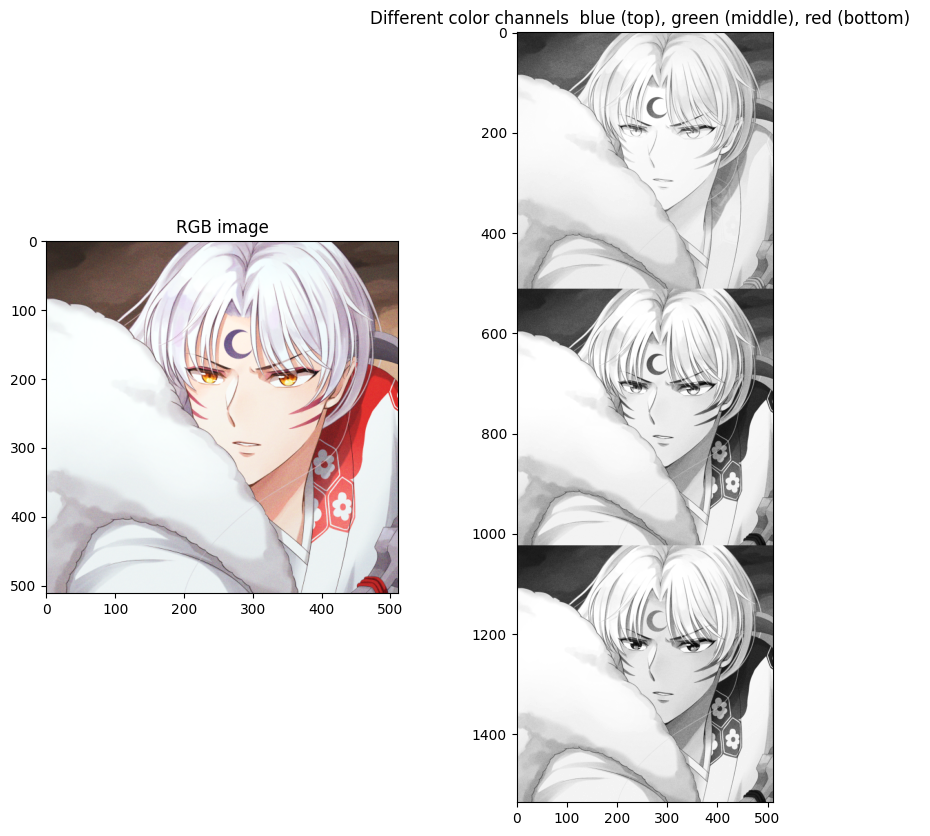

In [23]:
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image

def load_img_from_path_withColorMap(imagePath, colorMap): 
    img = os.path.join(os.getcwd(), imagePath)
    img = cv2.imread(img)
    img = cv2.cvtColor(img, colorMap)
    return img

img = load_img_from_path_withColorMap("imgs/sesshomaru.png", cv2.COLOR_BGR2RGB)
blue, green, red = img[:, :, 0], img[:, :, 1], img[:, :, 2] #Slicing operation, see the comment above for confusion on the : operand
img_channels = cv2.vconcat([blue, green, red])

plt.figure(figsize=(10,10))
plt.subplot(121)
plt.imshow(img)
plt.title("RGB image")
plt.subplot(122)
plt.imshow(img_channels,cmap='gray')
plt.title("Different color channels  blue (top), green (middle), red (bottom)  ")
plt.show()